Explore the data

In [2]:
import os 
import pandas as pd 

data_path = '/media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data'
mbhseg24_path = os.path.join(data_path, 'MBHSeg24')
mbhseg25_path = os.path.join(data_path, 'MBHSeg25')

mbhseg24_img_path = os.path.join(mbhseg24_path, 'images')
mbhseg24_mask_path = os.path.join(mbhseg24_path, 'ground_truths')
mbhseg24_anylabel = '/media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/MBHSeg24/unlabel_1980/unlabel_2000/anybleed'
mbhseg_nobleed = '/media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/MBHSeg24/unlabel_1980/unlabel_2000/nobleed'
mbhseg25_all_data = os.path.join(mbhseg25_path, 'MBH_Train_2025_voxel-label')
mbhseg25_case_level = os.path.join(mbhseg25_path, 'MBH_Train_2025_case-label')


## Exploratory Analysis

In [2]:
# ==================== MBHSeg24 Analysis ====================
print("="*60)
print("MBHSeg24 Dataset Analysis")
print("="*60)

# Count images in MBHSeg24
mbhseg24_images = [f for f in os.listdir(mbhseg24_img_path) if f.endswith('.nii.gz')]
num_images_24 = len(mbhseg24_images)
print(f"\nNumber of images: {num_images_24}")

# Count ground truths in MBHSeg24
mbhseg24_gts = [f for f in os.listdir(mbhseg24_mask_path) if f.endswith('.nii.gz')]
num_gts_24 = len(mbhseg24_gts)
print(f"Number of ground truths: {num_gts_24}")

# Count anybleed cases
anybleed_path = '/media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/MBHSeg24/unlabel_1980/unlabel_2000/anybleed'
if os.path.exists(anybleed_path):
    anybleed_cases = [f for f in os.listdir(anybleed_path) if f.endswith('.nii.gz')]
    num_anybleed = len(anybleed_cases)
    print(f"Number of anybleed cases: {num_anybleed}")
else:
    print("Anybleed folder not found")
    num_anybleed = 0

# Count nobleed cases
nobleed_path = '/media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/MBHSeg24/unlabel_1980/unlabel_2000/nobleed'
if os.path.exists(nobleed_path):
    nobleed_cases = [f for f in os.listdir(nobleed_path) if f.endswith('.nii.gz')]
    num_nobleed = len(nobleed_cases)
    print(f"Number of nobleed cases: {num_nobleed}")
else:
    print("Nobleed folder not found")
    num_nobleed = 0

MBHSeg24 Dataset Analysis

Number of images: 192
Number of ground truths: 192
Number of anybleed cases: 562
Number of nobleed cases: 1418


In [3]:
# ==================== MBHSeg25 Analysis ====================
print("\n" + "="*60)
print("MBHSeg25 Dataset Analysis")
print("="*60)

# Count voxel-level labels (folders with images and labels)
voxel_label_path = os.path.join(mbhseg25_path, 'MBH_Train_2025_voxel-label')
voxel_folders = [f for f in os.listdir(voxel_label_path) if os.path.isdir(os.path.join(voxel_label_path, f))]
num_voxel_samples = len(voxel_folders)
print(f"\nNumber of voxel-level labeled samples (folders): {num_voxel_samples}")

# Count total images in voxel-level folders
total_images = 0
total_labels = 0
for folder in voxel_folders:
    folder_path = os.path.join(voxel_label_path, folder)
    contents = os.listdir(folder_path)
    # Count images
    images = [f for f in contents if f.startswith('image') and f.endswith('.nii.gz')]
    total_images += len(images)
    # Count labels
    labels = [f for f in contents if f.startswith('label') and f.endswith('.nii.gz')]
    total_labels += len(labels)

print(f"Total number of images in voxel-level folders: {total_images}")
print(f"Total number of voxel-level labels: {total_labels}")

# Count case-level samples
case_label_path = os.path.join(mbhseg25_path, 'MBH_Train_2025_case-label')
case_csv = os.path.join(case_label_path, 'case-wise_annotation.csv')
if os.path.exists(case_csv):
    df_case = pd.read_csv(case_csv)
    num_case_samples = len(df_case)
    print(f"\nNumber of case-level samples (from CSV): {num_case_samples}")
    
    # Additional info from case-wise annotations
    if 'any' in df_case.columns:
        num_any_bleed = df_case['any'].sum()
        num_no_bleed = len(df_case) - num_any_bleed
        print(f"  - Cases with any bleed: {num_any_bleed}")
        print(f"  - Cases with no bleed: {num_no_bleed}")
else:
    print("Case-wise annotation CSV not found")
    num_case_samples = 0


MBHSeg25 Dataset Analysis

Number of voxel-level labeled samples (folders): 192
Total number of images in voxel-level folders: 192
Total number of voxel-level labels: 471

Number of case-level samples (from CSV): 577
  - Cases with any bleed: 577
  - Cases with no bleed: 0


In [4]:
# ==================== Summary ====================
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print("\nMBHSeg24:")
print(f"  Images: {num_images_24}")
print(f"  Ground Truths: {num_gts_24}")
print(f"  Anybleed Cases: {num_anybleed}")
print(f"  Nobleed Cases: {num_nobleed}")
print(f"  Total Unlabeled: {num_anybleed + num_nobleed}")

print("\nMBHSeg25:")
print(f"  Voxel-level samples (folders): {num_voxel_samples}")
print(f"  Total images: {total_images}")
print(f"  Total voxel-level labels: {total_labels}")
print(f"  Case-level samples: {num_case_samples}")
print("="*60)


SUMMARY

MBHSeg24:
  Images: 192
  Ground Truths: 192
  Anybleed Cases: 562
  Nobleed Cases: 1418
  Total Unlabeled: 1980

MBHSeg25:
  Voxel-level samples (folders): 192
  Total images: 192
  Total voxel-level labels: 471
  Case-level samples: 577


## Create MBHSeg25 Majority Voting Dataset

In [5]:
import nibabel as nib
import numpy as np
import shutil
from scipy import stats

# Create output directories
majority_voting_path = os.path.join(mbhseg25_path, 'Majority_voting')
majority_images_path = os.path.join(majority_voting_path, 'images')
majority_gts_path = os.path.join(majority_voting_path, 'ground_truths')

os.makedirs(majority_images_path, exist_ok=True)
os.makedirs(majority_gts_path, exist_ok=True)

print(f"Created directories:")
print(f"  {majority_images_path}")
print(f"  {majority_gts_path}")

Created directories:
  /media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/MBHSeg25/Majority_voting/images
  /media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/MBHSeg25/Majority_voting/ground_truths


In [7]:
# Process each voxel-level sample
voxel_label_path = os.path.join(mbhseg25_path, 'MBH_Train_2025_voxel-label')
voxel_folders = sorted([f for f in os.listdir(voxel_label_path) if os.path.isdir(os.path.join(voxel_label_path, f))])

print(f"\nProcessing {len(voxel_folders)} samples...")
print("="*60)

processed = 0
errors = []

for folder_name in voxel_folders:
    try:
        folder_path = os.path.join(voxel_label_path, folder_name)
        
        # Find image file
        image_file = None
        label_files = []
        
        for file in os.listdir(folder_path):
            if file.startswith('image') and file.endswith('.nii.gz'):
                image_file = file
            elif file.startswith('label') and file.endswith('.nii.gz'):
                label_files.append(file)
        
        if not image_file:
            print(f"Warning: No image file found in {folder_name}")
            errors.append(f"{folder_name}: No image file")
            continue
        
        if not label_files:
            print(f"Warning: No label files found in {folder_name}")
            errors.append(f"{folder_name}: No label files")
            continue
        
        # Copy image to the new location
        src_image = os.path.join(folder_path, image_file)
        dst_image = os.path.join(majority_images_path, f"{folder_name}.nii.gz")
        shutil.copy2(src_image, dst_image)
        
        # Load all labels and perform majority voting
        label_arrays = []
        image_nii = nib.load(src_image)
        
        for label_file in sorted(label_files):
            label_path = os.path.join(folder_path, label_file)
            label_nii = nib.load(label_path)
            label_data = label_nii.get_fdata()
            label_arrays.append(label_data)
        
        # Stack all labels and compute majority vote pixel-wise
        # Using scipy.stats.mode along axis 0 (across annotators)
        # by default, if there are 2 annotators saying different labels, we select the smaller label. it os good because if ther eis 0 and 1 we select 0. so we might stop mistakes. 
        stacked_labels = np.stack(label_arrays, axis=0)
        majority_label, _ = stats.mode(stacked_labels, axis=0, keepdims=False)
        
        # Save majority voting result
        majority_nii = nib.Nifti1Image(majority_label, image_nii.affine, image_nii.header)
        dst_label = os.path.join(majority_gts_path, f"{folder_name}.nii.gz")
        nib.save(majority_nii, dst_label)
        
        processed += 1
        if processed % 20 == 0:
            print(f"Processed {processed}/{len(voxel_folders)} samples...")
        
    except Exception as e:
        error_msg = f"{folder_name}: {str(e)}"
        errors.append(error_msg)
        print(f"Error processing {folder_name}: {str(e)}")

print("="*60)
print(f"\nProcessing complete!")
print(f"Successfully processed: {processed}/{len(voxel_folders)}")
print(f"Errors: {len(errors)}")

if errors:
    print("\nError details:")
    for error in errors[:10]:  # Show first 10 errors
        print(f"  - {error}")


Processing 192 samples...


KeyboardInterrupt: 

In [ ]:
# Verify the created dataset
final_images = len([f for f in os.listdir(majority_images_path) if f.endswith('.nii.gz')])
final_labels = len([f for f in os.listdir(majority_gts_path) if f.endswith('.nii.gz')])

print("\n" + "="*60)
print("FINAL VERIFICATION")
print("="*60)
print(f"\nMBHSeg25/Majority_voting/")
print(f"  images/: {final_images} files")
print(f"  ground_truths/: {final_labels} files")
print("="*60)

## Create 5-Fold Cross-Validation Splits

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from pathlib import Path

# Create splits directory
splits_base_path = os.path.join(data_path, 'splits')
mbhseg24_splits_path = os.path.join(splits_base_path, 'mbhseg24')
mbhseg25_splits_path = os.path.join(splits_base_path, 'mbhseg25')5

os.makedirs(mbhseg24_splits_path, exist_ok=True)
os.makedirs(mbhseg25_splits_path, exist_ok=True)

print(f"Created splits directories:")
print(f"  {mbhseg24_splits_path}")
print(f"  {mbhseg25_splits_path}")

Created splits directories:
  /media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/splits/mbhseg24
  /media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/splits/mbhseg25


In [9]:
# ==================== MBHSeg24 5-Fold Splits ====================
print("\n" + "="*60)
print("Creating 5-Fold Splits for MBHSeg24")
print("="*60)

# Get all patient IDs from MBHSeg24 images (base name without extension)
mbhseg24_patient_ids = sorted([f.replace('.nii.gz', '') for f in mbhseg24_images])
print(f"\nTotal MBHSeg24 patients: {len(mbhseg24_patient_ids)}")

# Create 5-fold splits with random shuffle
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mbhseg24_patient_array = np.array(mbhseg24_patient_ids)

for fold_idx, (train_idx, test_idx) in enumerate(kfold.split(mbhseg24_patient_array)):
    # Split train into train and validation (80-20)
    train_indices = train_idx
    val_indices = test_idx
    
    # Further split train into train and val (75% train, 25% val of the train set)
    num_val = int(0.2 * len(train_indices))
    val_idx_from_train = np.random.permutation(len(train_indices))[:num_val]
    train_idx_final = np.delete(train_indices, val_idx_from_train)
    val_idx_final = train_indices[val_idx_from_train]
    
    # Get patient names
    train_patients = mbhseg24_patient_array[train_idx_final]
    val_patients = mbhseg24_patient_array[val_idx_final]
    test_patients = mbhseg24_patient_array[val_indices]
    
    # Create fold directory
    fold_dir = os.path.join(mbhseg24_splits_path, f'fold_{fold_idx}')
    os.makedirs(fold_dir, exist_ok=True)
    
    # Save splits as txt files
    with open(os.path.join(fold_dir, 'train.txt'), 'w') as f:
        f.write('\n'.join(train_patients))
    
    with open(os.path.join(fold_dir, 'val.txt'), 'w') as f:
        f.write('\n'.join(val_patients))
    
    with open(os.path.join(fold_dir, 'test.txt'), 'w') as f:
        f.write('\n'.join(test_patients))
    
    print(f"\nFold {fold_idx}:")
    print(f"  Train: {len(train_patients)} patients")
    print(f"  Val: {len(val_patients)} patients")
    print(f"  Test: {len(test_patients)} patients")

print("\nMBHSeg24 splits saved successfully!")


Creating 5-Fold Splits for MBHSeg24

Total MBHSeg24 patients: 192

Fold 0:
  Train: 123 patients
  Val: 30 patients
  Test: 39 patients

Fold 1:
  Train: 123 patients
  Val: 30 patients
  Test: 39 patients

Fold 2:
  Train: 124 patients
  Val: 30 patients
  Test: 38 patients

Fold 3:
  Train: 124 patients
  Val: 30 patients
  Test: 38 patients

Fold 4:
  Train: 124 patients
  Val: 30 patients
  Test: 38 patients

MBHSeg24 splits saved successfully!


In [10]:
# ==================== MBHSeg25 5-Fold Splits ====================
print("\n" + "="*60)
print("Creating 5-Fold Splits for MBHSeg25")
print("="*60)

# Get all patient IDs from MBHSeg25 voxel-level (folder names)
mbhseg25_patient_ids = sorted(voxel_folders)
print(f"\nTotal MBHSeg25 patients: {len(mbhseg25_patient_ids)}")

# Create 5-fold splits with random shuffle
mbhseg25_patient_array = np.array(mbhseg25_patient_ids)

for fold_idx, (train_idx, test_idx) in enumerate(kfold.split(mbhseg25_patient_array)):
    # Split train into train and validation (80-20)
    train_indices = train_idx
    val_indices = test_idx
    
    # Further split train into train and val (75% train, 25% val of the train set)
    num_val = int(0.2 * len(train_indices))
    val_idx_from_train = np.random.permutation(len(train_indices))[:num_val]
    train_idx_final = np.delete(train_indices, val_idx_from_train)
    val_idx_final = train_indices[val_idx_from_train]
    
    # Get patient names
    train_patients = mbhseg25_patient_array[train_idx_final]
    val_patients = mbhseg25_patient_array[val_idx_final]
    test_patients = mbhseg25_patient_array[val_indices]
    
    # Create fold directory
    fold_dir = os.path.join(mbhseg25_splits_path, f'fold_{fold_idx}')
    os.makedirs(fold_dir, exist_ok=True)
    
    # Save splits as txt files
    with open(os.path.join(fold_dir, 'train.txt'), 'w') as f:
        f.write('\n'.join(train_patients))
    
    with open(os.path.join(fold_dir, 'val.txt'), 'w') as f:
        f.write('\n'.join(val_patients))
    
    with open(os.path.join(fold_dir, 'test.txt'), 'w') as f:
        f.write('\n'.join(test_patients))
    
    print(f"\nFold {fold_idx}:")
    print(f"  Train: {len(train_patients)} patients")
    print(f"  Val: {len(val_patients)} patients")
    print(f"  Test: {len(test_patients)} patients")

print("\nMBHSeg25 splits saved successfully!")


Creating 5-Fold Splits for MBHSeg25

Total MBHSeg25 patients: 192

Fold 0:
  Train: 123 patients
  Val: 30 patients
  Test: 39 patients

Fold 1:
  Train: 123 patients
  Val: 30 patients
  Test: 39 patients

Fold 2:
  Train: 124 patients
  Val: 30 patients
  Test: 38 patients

Fold 3:
  Train: 124 patients
  Val: 30 patients
  Test: 38 patients

Fold 4:
  Train: 124 patients
  Val: 30 patients
  Test: 38 patients

MBHSeg25 splits saved successfully!


In [11]:
# Verify splits were created
print("\n" + "="*60)
print("SPLIT VERIFICATION")
print("="*60)

for dataset_name, splits_path in [("MBHSeg24", mbhseg24_splits_path), ("MBHSeg25", mbhseg25_splits_path)]:
    print(f"\n{dataset_name} splits:")
    for fold_idx in range(5):
        fold_dir = os.path.join(splits_path, f'fold_{fold_idx}')
        train_count = len([line for line in open(os.path.join(fold_dir, 'train.txt')).readlines() if line.strip()])
        val_count = len([line for line in open(os.path.join(fold_dir, 'val.txt')).readlines() if line.strip()])
        test_count = len([line for line in open(os.path.join(fold_dir, 'test.txt')).readlines() if line.strip()])
        print(f"  Fold {fold_idx}: Train={train_count}, Val={val_count}, Test={test_count}")

print("\n" + "="*60)
print("Splits saved to:")
print(f"  {mbhseg24_splits_path}")
print(f"  {mbhseg25_splits_path}")
print("="*60)


SPLIT VERIFICATION

MBHSeg24 splits:
  Fold 0: Train=123, Val=30, Test=39
  Fold 1: Train=123, Val=30, Test=39
  Fold 2: Train=124, Val=30, Test=38
  Fold 3: Train=124, Val=30, Test=38
  Fold 4: Train=124, Val=30, Test=38

MBHSeg25 splits:
  Fold 0: Train=123, Val=30, Test=39
  Fold 1: Train=123, Val=30, Test=39
  Fold 2: Train=124, Val=30, Test=38
  Fold 3: Train=124, Val=30, Test=38
  Fold 4: Train=124, Val=30, Test=38

Splits saved to:
  /media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/splits/mbhseg24
  /media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data/splits/mbhseg25


## Visualize Random Crops from MBHSeg Dataset

In [7]:
import matplotlib.pyplot as plt
from torchvision import transforms
from dataloders.mbhseg import MBHSegDataset, ROICrop, RandomRotFlip, ToTensor

# Setup dataset configs
DATA_ROOT = data_path  # '/media/cansu/DiskSpace/Cansu/Benchmarking-MBHSeg/data'
PATCH_SIZE = [96, 96, 96]
FOLD = 0

# Use ROICrop: 80% lesion-centered crops, 20% random uniform crops
transform_pipeline = transforms.Compose([
    RandomRotFlip(),
    ROICrop(mask_key='label', margin=10, max_crop=PATCH_SIZE, prob=0.5, mode='constant', constant_values=0),
    ToTensor(),
])

# Instantiate MBHSeg24 training dataset with ROICrop
ds24_train = MBHSegDataset(
    data_root=DATA_ROOT,
    dataset='mbhseg24',
    fold=FOLD,
    split='train',
    return_label=True,
    transform=transform_pipeline,
)

print(f"MBHSeg24 train samples: {len(ds24_train)}")
print("Transform: RandomRotFlip → ROICrop (80% lesion-centered, 20% random) → ToTensor")

Loaded 123 patients for mbhseg24 fold 0 [train]
MBHSeg24 train samples: 123
Transform: RandomRotFlip → ROICrop (80% lesion-centered, 20% random) → ToTensor


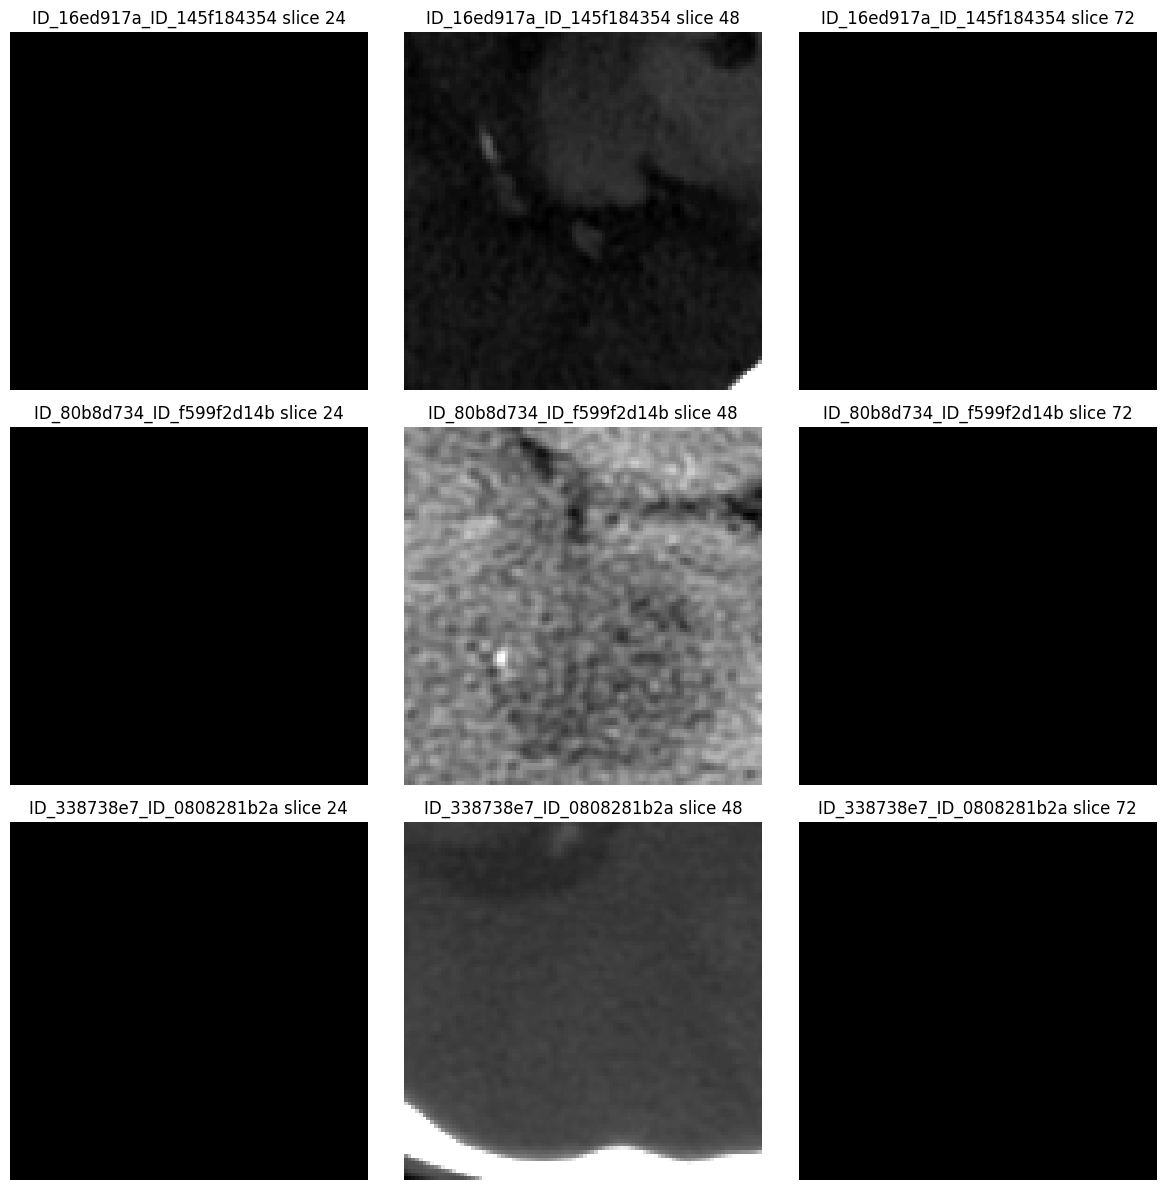

In [5]:
# Visualize a few random cropped slices
import numpy as np
num_to_show = 3
indices = np.random.choice(len(ds24_train), size=min(num_to_show, len(ds24_train)), replace=False)

fig, axes = plt.subplots(len(indices), 3, figsize=(12, 4 * len(indices)))
if len(indices) == 1:
    axes = np.array([axes])

for row, i in enumerate(indices):
    sample = ds24_train[i]
    img = sample['image'].numpy()[0]  # [W, H, D]
    pid = sample['pid']
    shape = img.shape
    mid_slices = [shape[2] // 4, shape[2] // 2, 3 * shape[2] // 4]

    for col, s in enumerate(mid_slices):
        axes[row, col].imshow(img[:, :, int(s)], cmap='gray')
        axes[row, col].axis('off')
        axes[row, col].set_title(f"{pid} slice {int(s)}")

plt.tight_layout()
plt.show()

## Show 5 Training Samples (ROICrop + Lesion Mask Overlay)

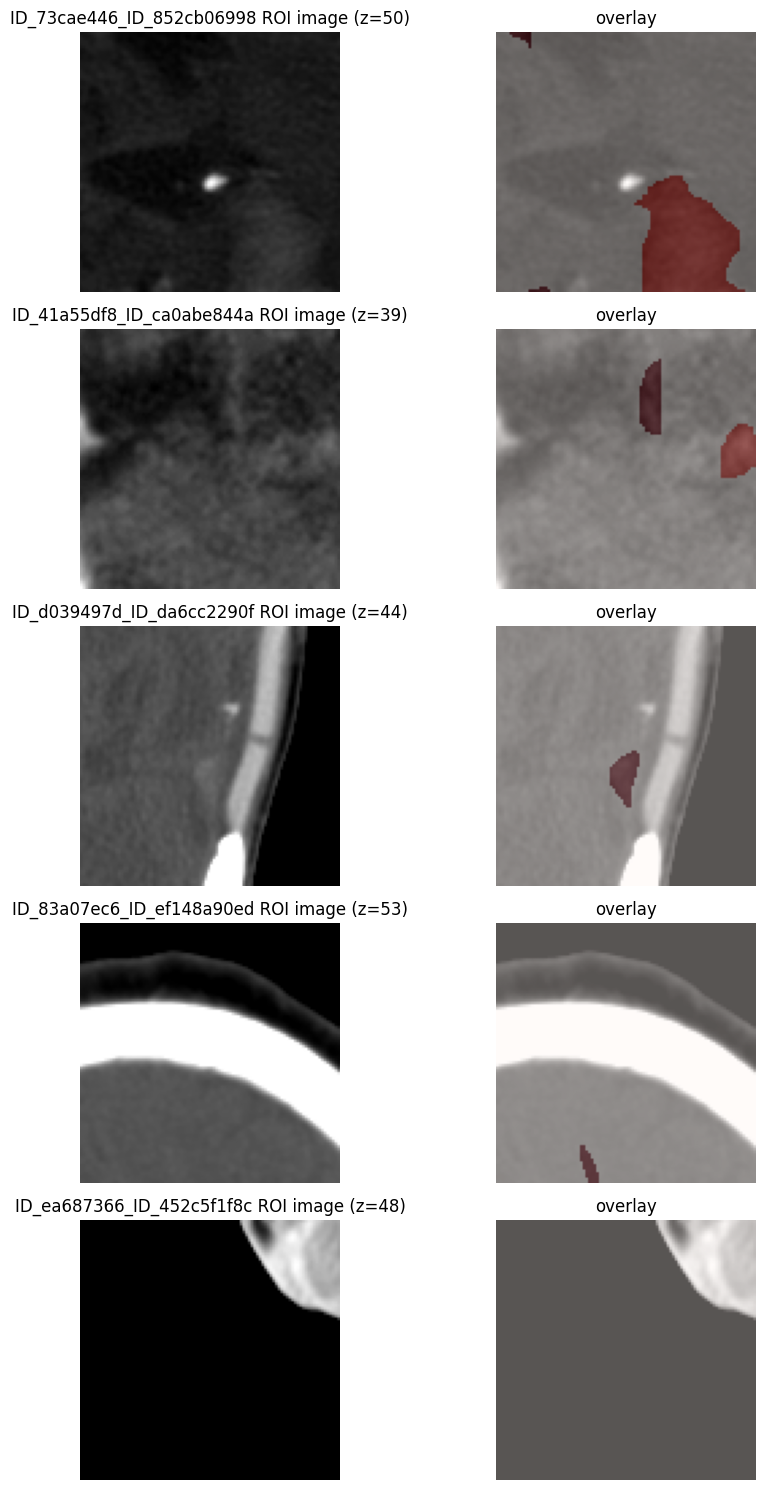


ROICrop results: 80% lesion-centered, 20% random fallback


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Build training dataloader with ROICrop
train_loader_roi = DataLoader(ds24_train, batch_size=1, shuffle=True, num_workers=0)

# Collect 5 ROI-cropped samples
samples_roi = []
for i, batch in enumerate(train_loader_roi):
    samples_roi.append(batch)
    if len(samples_roi) >= 5:
        break

# Plot mid-lesion axial slice for each ROI-cropped sample
fig, axes = plt.subplots(len(samples_roi), 2, figsize=(10, 3 * len(samples_roi)))
if len(samples_roi) == 1:
    axes = np.array([axes])

for row, batch in enumerate(samples_roi):
    img = batch['image'][0].numpy()[0]  # [W,H,D]
    lab = batch['label'][0].numpy()     # [W,H,D]
    pid = batch['pid'][0] if 'pid' in batch else f"sample_{row}"

    # Find axial slices with lesions
    z_has_lesion = lab.sum(axis=(0,1)) > 0
    if np.any(z_has_lesion):
        z_indices = np.where(z_has_lesion)[0]
        z_mid = int((z_indices.min() + z_indices.max()) // 2)
    else:
        z_mid = img.shape[2] // 2

    img_slice = img[:, :, z_mid]
    lab_slice = lab[:, :, z_mid]

    # Left: image only
    axes[row, 0].imshow(img_slice, cmap='gray')
    axes[row, 0].axis('off')
    axes[row, 0].set_title(f"{pid} ROI image (z={z_mid})")

    # Right: image + mask overlay
    axes[row, 1].imshow(img_slice, cmap='gray')
    axes[row, 1].imshow(lab_slice, cmap='Reds', alpha=0.35)
    axes[row, 1].axis('off')
    axes[row, 1].set_title("overlay")

plt.tight_layout()
plt.show()
print("\nROICrop results: 80% lesion-centered, 20% random fallback")